In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/Users/fushengluo/Desktop/Johns Hopkins Graduate/Modules/EquityMarket/Project/Dataset/CompleteETFs_aftercleaning/After_DataPreprocessing_dataset.csv")

In [3]:
df.head()

,Date,Close_AGG,Close_BND,Close_DBC,Close_DIA,Close_DVY,Close_EEM,Close_EFA,Close_EMB,Close_EWA,...,Bollinger_Low_XLV,OBV_XLV,RSI_14_XLY,MACD_Line_XLY,MACD_Signal_XLY,MACD_Hist_XLY,Bollinger_MAVG_XLY,Bollinger_High_XLY,Bollinger_Low_XLY,OBV_XLY
0,2014-04-08,81.121582,60.045574,22.992090,129.371597,49.856174,32.908230,48.475220,66.895653,16.324753,...,47.722944,-96704400.0,41.076004,-0.321312,-0.246012,-0.075300,57.436035,59.042757,55.829314,-18325100.0
1,2014-04-09,81.129074,60.030769,23.053263,130.782227,50.046890,33.159203,49.097431,66.943527,16.597242,...,47.730484,-82265800.0,46.758589,-0.303601,-0.257530,-0.046072,57.357165,58.882910,55.831419,-14483700.0
2,2014-04-10,81.316772,60.215454,23.062000,128.686188,49.488350,32.806271,48.229233,67.260468,16.349522,...,47.396396,-99888300.0,37.637720,-0.399397,-0.285903,-0.113494,57.242949,58.929730,55.556167,-24559200.0
3,2014-04-11,81.391800,60.252422,22.957134,127.530609,49.215855,32.806271,47.939819,67.152840,16.281403,...,47.005083,-114598400.0,33.800725,-0.531034,-0.334929,-0.196104,57.093050,59.056958,55.129141,-33005400.0
4,2014-04-14,81.421814,60.245022,23.166866,128.670273,49.617744,32.735691,48.214752,67.021271,16.250435,...,46.744724,-103513100.0,37.655642,-0.593685,-0.386680,-0.207005,56.945412,58.993484,54.897341,-28304300.0


## Data Prepocessing

In [4]:
data = df.copy()

In [5]:
selected_cols1 = [col for col in data.columns if col.startswith('Close') and not col.endswith('smoothed')]
selected_cols = ['Date'] + selected_cols1  # Put 'Date' at the front
data = data[selected_cols]

print(data.head())

         Date  Close_AGG  Close_BND  Close_DBC   Close_DIA  Close_DVY  \
0  2014-04-08  81.121582  60.045574  22.992090  129.371597  49.856174   
1  2014-04-09  81.129074  60.030769  23.053263  130.782227  50.046890   
2  2014-04-10  81.316772  60.215454  23.062000  128.686188  49.488350   
3  2014-04-11  81.391800  60.252422  22.957134  127.530609  49.215855   
4  2014-04-14  81.421814  60.245022  23.166866  128.670273  49.617744   

   Close_EEM  Close_EFA  Close_EMB  Close_EWA  ...  Close_VYM  Close_XLB  \
0  32.908230  48.475220  66.895653  16.324753  ...  44.589783  37.508682   
1  33.159203  49.097431  66.943527  16.597242  ...  44.909180  38.077362   
2  32.806271  48.229233  67.260468  16.349522  ...  44.192287  37.316456   
3  32.806271  47.939819  67.152840  16.281403  ...  43.908363  36.867928   
4  32.735691  48.214752  67.021271  16.250435  ...  44.163898  37.164265   

   Close_XLE  Close_XLF  Close_XLI  Close_XLK  Close_XLP  Close_XLU  \
0  58.434254  14.417064  42.28933

In [6]:
# apply the transformation to the change in percentage
data[selected_cols1] = data[selected_cols1].pct_change(fill_method=None).dropna()

In [7]:
data = data.dropna()
print(data.head)

<bound method NDFrame.head of             Date  Close_AGG  Close_BND  Close_DBC  Close_DIA  Close_DVY  \
1     2014-04-09   0.000092  -0.000247   0.002661   0.010904   0.003825   
2     2014-04-10   0.002314   0.003077   0.000379  -0.016027  -0.011160   
3     2014-04-11   0.000923   0.000614  -0.004547  -0.008980  -0.005506   
4     2014-04-14   0.000369  -0.000123   0.009136   0.008936   0.008166   
5     2014-04-15   0.000092   0.000491   0.000755   0.005637   0.008512   
...          ...        ...        ...        ...        ...        ...   
2729  2025-02-12  -0.005243  -0.005122  -0.011077  -0.005559  -0.005399   
2730  2025-02-13   0.005994   0.005983   0.004928   0.008183   0.009369   
2731  2025-02-14   0.003698   0.003181   0.000446  -0.003287  -0.000221   
2732  2025-02-18  -0.003992  -0.003722   0.014706   0.000292   0.010169   
2733  2025-02-19   0.001439   0.001384   0.007905   0.001682   0.004523   

      Close_EEM  Close_EFA  Close_EMB  Close_EWA  ...  Close_VYM  Clo

### Mean reversion and momentum via Fama-Macbeth - Sharpe ratio and profit per trade

In [8]:
data.set_index('Date', inplace=True)
df_rtn = data.copy()

In [9]:
print(df_rtn.head())

            Close_AGG  Close_BND  Close_DBC  Close_DIA  Close_DVY  Close_EEM  \
Date                                                                           
2014-04-09   0.000092  -0.000247   0.002661   0.010904   0.003825   0.007626   
2014-04-10   0.002314   0.003077   0.000379  -0.016027  -0.011160  -0.010644   
2014-04-11   0.000923   0.000614  -0.004547  -0.008980  -0.005506   0.000000   
2014-04-14   0.000369  -0.000123   0.009136   0.008936   0.008166  -0.002151   
2014-04-15   0.000092   0.000491   0.000755   0.005637   0.008512  -0.015093   

            Close_EFA  Close_EMB  Close_EWA  Close_EWC  ...  Close_VYM  \
Date                                                    ...              
2014-04-09   0.012836   0.000716   0.016692   0.009021  ...   0.007163   
2014-04-10  -0.017683   0.004734  -0.014925  -0.014901  ...  -0.015963   
2014-04-11  -0.006001  -0.001600  -0.004166  -0.008403  ...  -0.006425   
2014-04-14   0.005735  -0.001959  -0.001902   0.005085  ...   0.00582

In [10]:
# mean reversion signal based on r(t-5) + ... + r(t-1)
# captures short-term overreactions (e.g., market pullbacks)
mr_sig_raw = -df_rtn.shift(1).rolling(21).sum().dropna()

# momentum signal based on r(t-84) + ... + r(t-22)
# captures quarterly trends (common in momentum strategies).
mom_sig_raw = df_rtn.shift(22).rolling(63).sum().dropna()

In [11]:
# This function normalizes panel cross-sections to have mean 0, variance 1.
def normalize(panel_data):
    return panel_data.sub(panel_data.mean(axis=1), axis=0).div(panel_data.std(axis=1), axis=0)

In [12]:
mr_sig_norm = normalize(mr_sig_raw)
mom_sig_norm = normalize(mom_sig_raw)

In [24]:
mr_sig_norm.head()

,Close_AGG,Close_BND,Close_DBC,Close_DIA,Close_DVY,Close_EEM,Close_EFA,Close_EMB,Close_EWA,Close_EWC,...,Close_VYM,Close_XLB,Close_XLE,Close_XLF,Close_XLI,Close_XLK,Close_XLP,Close_XLU,Close_XLV,Close_XLY
Date,,,,,,,,,,,,,,,,,,,,,
2014-05-09,-0.170257,-0.198679,0.379857,-0.714087,-0.654507,0.524397,-0.725322,-0.767485,-0.188824,-0.847917,...,-0.822310,-0.737907,-2.019450,0.023698,-0.882942,-0.244417,-0.980770,-0.836579,-0.251715,0.603984
2014-05-12,-0.512446,-0.542884,0.365215,-0.687368,-0.693270,0.593532,-0.423570,-1.035095,0.308104,-0.469896,...,-0.885159,-0.394172,-2.157201,0.080595,-0.695446,-0.038580,-1.396398,-0.621513,0.104578,0.476433
2014-05-13,0.966083,0.981109,1.633654,-0.547405,-0.139036,0.554552,-0.357834,0.540591,0.744756,-0.347274,...,-0.706449,-0.765137,-2.020963,-0.283286,-1.186216,-0.584170,-0.691207,0.967853,-0.795076,-0.083713
2014-05-14,1.111857,1.103069,1.312019,-0.619758,-0.036604,0.623407,-0.322892,0.692568,0.736202,-0.384809,...,-0.651949,-0.911744,-1.709198,-0.423614,-1.217492,-0.709004,-0.594984,0.997415,-0.853897,-0.244925
2014-05-15,0.700278,0.680563,1.259856,-0.363114,0.054128,-0.158324,-0.375216,0.020856,0.173256,-0.644669,...,-0.686763,-1.007431,-1.614467,-0.117478,-1.084864,-0.460744,-0.395834,0.743625,-1.087158,0.262481


In [13]:
# This function takes a panel of positions and returns a time series of returns (in $).
def returns_from_positions(position_data, df_rtn):
    return (position_data * df_rtn).dropna().sum(axis=1)

In [73]:
# The Fama-Macbeth approach is equivalent to positions that are proportional to factors (signals).
# Also, we only want returns from beginning of 2014, so that we can compare momentum and
# mean reversion returns over the same time periods.
mr_rtn = returns_from_positions(mr_sig_norm, df_rtn)['2022-12-21':]
mom_rtn = returns_from_positions(mom_sig_norm, df_rtn)['2022-12-21':]

In [74]:
# This function takes a time series of daily returns & returns an annualized Sharpe ratio.
def sharpe_ratio(daily_return_series):
    return round(daily_return_series.mean() / daily_return_series.std() * 252**0.5, 2)

In [75]:
sharpe_ratio(mr_rtn), sharpe_ratio(mom_rtn)

(0.24, -0.44)

In [76]:
mr_std, mom_std = mr_rtn.std()* 252**0.5, mom_rtn.std()* 252**0.5
print(f"yearly standard deviation of mean-revertion: {mr_std:.4f}, of momentum: {mom_std:.4f}")

yearly standard deviation of mean-revertion: 5.0058, of momentum: 4.7801


In [18]:
# Create a dataframe of factor returns and find its correlation matrix.
df_factors = pd.concat([mr_rtn, mom_rtn], axis=1, keys=["mr","mom"])
df_factors.corr()

,mr,mom
mr,1.000000,0.072751
mom,0.072751,1.000000


In [77]:
# Form a portfolio with 50% momentum strategy and 50% mean reversion strategy.
both_rtn = 0.2*mom_rtn + 0.8*mr_rtn
sharpe_ratio(both_rtn)

0.14

In [79]:
both_rtn.std()*252**0.5

4.1106641398524655

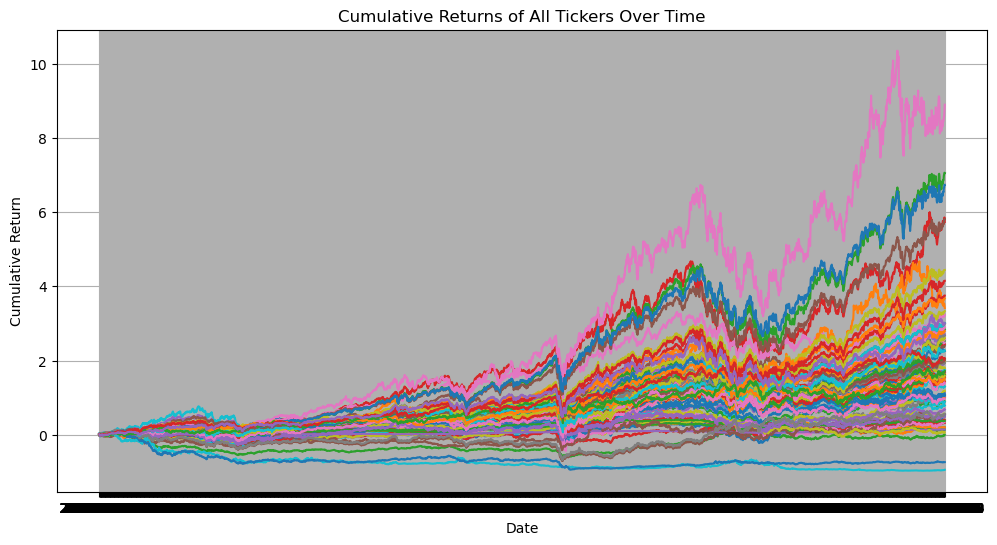

In [21]:
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
# Compute cumulative returns
cumulative_returns = (1 + df_rtn).cumprod() - 1

# Plot all columns in a single figure
plt.figure(figsize=(12, 6))
for column in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[column], label=column)

plt.title('Cumulative Returns of All Tickers Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()

In [32]:
import torch

checkpoint = torch.load('checkpoint_separateTickers.pth', map_location='cpu', weights_only=False)


In [34]:
print(checkpoint.keys())

dict_keys(['epoch', 'model_state_dict', 'optimizer_state_dict', 'val_losses', 'meta', 'return'])


In [35]:
meta = checkpoint['return']

In [41]:
print(meta)
print(type(meta))
print(len(meta))

[{'strategy_return': 0.003160967998544921, 'cum_return': 0.003160967998544921, 'cum_max': 0.003160967998544921, 'drawdown': 0.0}, {'strategy_return': -0.0025435408794379916, 'cum_return': 0.0006174271191069294, 'cum_max': 0.003160967998544921, 'drawdown': -0.0025435408794379916}, {'strategy_return': 0.0021192097255596865, 'cum_return': 0.002736636844666616, 'cum_max': 0.003160967998544921, 'drawdown': -0.0004243311538783051}, {'strategy_return': -0.009822604034790051, 'cum_return': -0.0070859671901234355, 'cum_max': 0.003160967998544921, 'drawdown': -0.010246935188668357}, {'strategy_return': 0.003188008900460157, 'cum_return': -0.0038979582896632786, 'cum_max': 0.003160967998544921, 'drawdown': -0.0070589262882082}, {'strategy_return': 0.008281098777480277, 'cum_return': 0.004383140487816998, 'cum_max': 0.004383140487816998, 'drawdown': 0.0}, {'strategy_return': 0.0015478568592888027, 'cum_return': 0.005930997347105801, 'cum_max': 0.005930997347105801, 'drawdown': 0.0}, {'strategy_ret

In [49]:
cum_returns = pd.Series([entry['cum_return'] for entry in meta])
print(len(cum_returns))

541


In [46]:
print(len(mr_rtn.cumsum()[120:]))

541


In [68]:
(1 + df_rtn).cumprod() - 1
mr_rtn_cum2 = (1 + mr_rtn.cumsum()[120:]- mr_rtn.cumsum().iloc[120]).cumprod() - 1
mom_rtn_cum2 = (1 + mom_rtn.cumsum()[120:]- mom_rtn.cumsum().iloc[120]).cumprod() - 1

In [ ]:
mr_rtn_cum = (1 + mr_rtn.cumsum()[120:]- mr_rtn.cumsum().iloc[120]).cumprod() - 1
mr_rtn_cum_std = mr_rtn_cum/mr_rtn_cum.std()

In [58]:
mom_rtn_cum = mom_rtn.cumsum()[120:]- mom_rtn.cumsum().iloc[120]
mom_rtn_cum_std = mom_rtn_cum/mom_rtn_cum.std()

In [59]:
both_rtn_cum = both_rtn.cumsum()[120:]- both_rtn.cumsum().iloc[120]
both_rtn_cum_std = both_rtn_cum/both_rtn_cum.std()

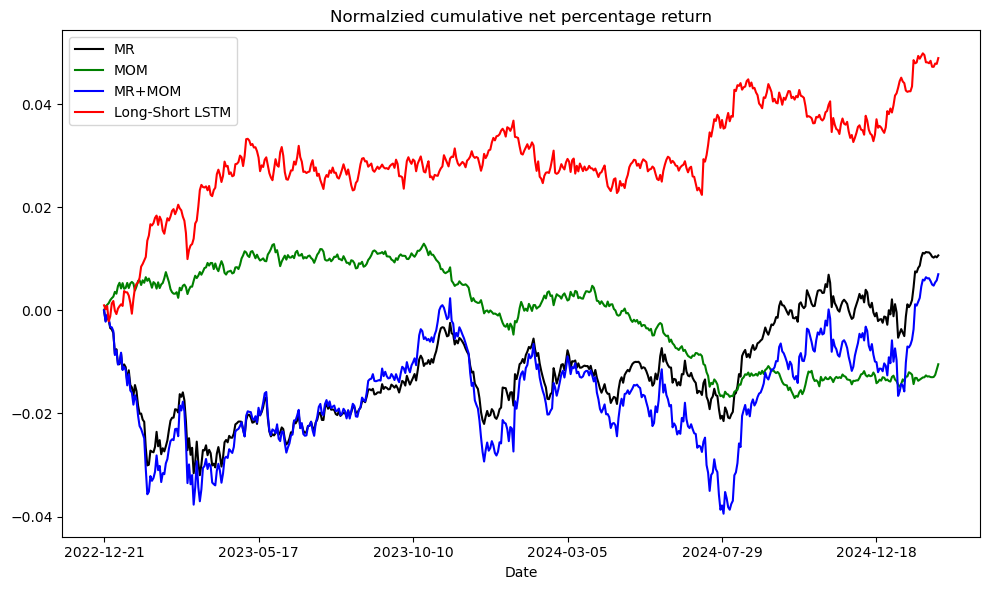

In [60]:
# Normalize the plot so every return has same annual volatility (15%).
plt.figure(figsize=(10,6))
(mr_rtn_cum_std * (0.15/252**0.5)).plot(c='black',label='MR')
(mom_rtn_cum_std * (0.15/252**0.5)).plot(c='green', label='MOM')
(both_rtn_cum_std * (0.15/252**0.5)).plot(c='blue', label='MR+MOM')
(cum_returns/cum_returns.std() * (0.15/252**0.5)).plot(c='red', label='Long-Short LSTM')

plt.title("Normalzied cumulative net percentage return")
plt.legend()
plt.tight_layout()
plt.show()

In [71]:
mom_rtn_cum2[mom_rtn_cum<-1]

Date
2024-01-03   -1.285786e+151
2024-01-04    4.037895e+150
2024-01-05   -1.568072e+150
2024-01-08    2.227370e+149
2024-01-09   -1.406496e+149
                  ...      
2025-02-12   -2.110648e+256
2025-02-13    9.722308e+256
2025-02-14   -4.305349e+257
2025-02-18    1.716410e+258
2025-02-19   -6.067723e+258
Length: 203, dtype: float64

In [81]:
# Fix cumulative returns
mom_cum_returns = (1 + mom_rtn).cumprod() - 1
mr_cum_returns = (1 + mr_rtn).cumprod() - 1

In [82]:
def calculate_max_drawdown(cum_returns):
    # cum_returns: cumulative return series (e.g., starting from 0)
    running_max = np.maximum.accumulate(cum_returns)
    drawdown = cum_returns / running_max - 1
    max_drawdown = drawdown.min()
    return max_drawdown

def calculate_annualized_return(cum_returns, periods_per_year=252):
    # cum_returns: cumulative return series (starting from 0)
    total_return = cum_returns.iloc[-1]
    total_periods = len(cum_returns)
    annualized_return = (1 + total_return) ** (periods_per_year / total_periods) - 1
    return annualized_return


# Calculate for Momentum strategy
mom_max_dd = calculate_max_drawdown(mom_cum_returns)
mom_ann_return = calculate_annualized_return(mom_cum_returns)

# Calculate for Mean-Reversion strategy
mr_max_dd = calculate_max_drawdown(mr_cum_returns)
mr_ann_return = calculate_annualized_return(mr_cum_returns)

print(f"Momentum Max Drawdown: {mom_max_dd:.2%}")
print(f"Momentum Annualized Return: {mom_ann_return:.2%}")

print(f"Mean-Reversion Max Drawdown: {mr_max_dd:.2%}")
print(f"Mean-Reversion Annualized Return: {mr_ann_return:.2%}")

Momentum Max Drawdown: -116.82%
Momentum Annualized Return: nan%
Mean-Reversion Max Drawdown: -382.34%
Mean-Reversion Annualized Return: nan%


/var/folders/pp/pz7_g_rx1_ddnc7_tgtml3040000gn/T/ipykernel_15580/3602862000.py:12: RuntimeWarning: invalid value encountered in scalar power
  annualized_return = (1 + total_return) ** (periods_per_year / total_periods) - 1


### Find the negative cumulative returns among all ETFs

In [23]:
# Get the last row (final cumulative returns)
final_returns = cumulative_returns.iloc[-1]

# Filter ETFs with negative final returns
negative_etfs = final_returns[final_returns < 0]

print("ETFs with Negative Cumulative Returns:")
print(negative_etfs)

ETFs with Negative Cumulative Returns:
Close_DBC   -0.001831
Close_UNG   -0.944057
Close_USO   -0.737636
Name: 2025-02-19, dtype: float64
